# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

- n_samples: The total number of points equally divided among clusters.
  - Choose a number from 10-1500
- centers: The number of centers to generate, or the fixed center locations.
    - Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
- cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
    - Choose a number between 0.5-1.5

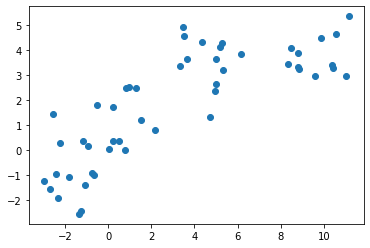

In [2]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

The Agglomerative Clustering class will require two inputs:

- n_clusters: The number of clusters to form as well as the number of centroids to generate.
    - Value will be: 4
- linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    - Value will be: 'complete'
    - Note: It is recommended you try everything with 'average' as well

In [3]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

Visualization

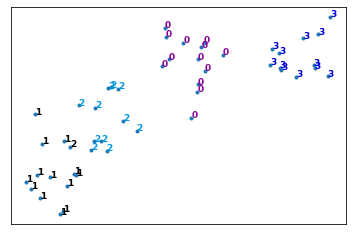

In [4]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
            color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
            fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [5]:
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.30100222 0.27700012 ... 0.6921698  0.26367166 0.30215835]
 [0.30100222 0.         0.53590236 ... 0.43600444 0.12542086 0.60277036]
 [0.27700012 0.53590236 0.         ... 0.83484703 0.44675005 0.2374562 ]
 ...
 [0.6921698  0.43600444 0.83484703 ... 0.         0.42850029 0.98126094]
 [0.26367166 0.12542086 0.44675005 ... 0.42850029 0.         0.55691444]
 [0.30215835 0.60277036 0.2374562  ... 0.98126094 0.55691444 0.        ]]


Complete

<ipython-input-7-c6662060f767>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


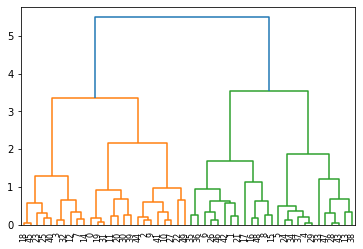

In [7]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

Average

<ipython-input-8-90bcb3750f27>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


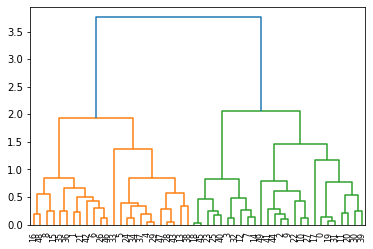

In [8]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)